In [3]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

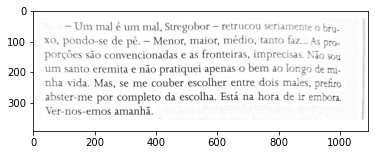

In [4]:
imagem = cv2.imread('imagens/trecho_livro.png')
plt.imshow(imagem)

In [5]:
texto = pytesseract.image_to_string(imagem, lang='por')
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bru.
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... A
porções são convencionadas e as fronteiras, imprecisas. »
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Está na hora de ir embora.
Ver-nos-emos amanhã.

 

S pro-

ão Sou

 

 



In [6]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata --psm 6'

In [7]:
texto = pytesseract.image_to_string(imagem, lang='por', config=config_tesseract)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bru.
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... A
porções são convencionadas e as fronteiras, imprecisas. »
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Está na hora de ir embora.
Ver-nos-emos amanhã.

 

S pro-

ão Sou

 

 



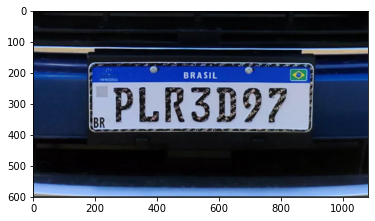

In [38]:
imagem = cv2.imread('imagens/placa_carro1.png')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)

In [39]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

In [9]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata'
texto = pytesseract.image_to_string(imagem, lang='por', config=config_tesseract)
print(texto)

## Aplicando limiar na imagem

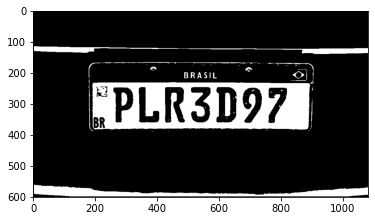

In [10]:
limiar = 160
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
plt.imshow(lim_simples, cmap='gray');

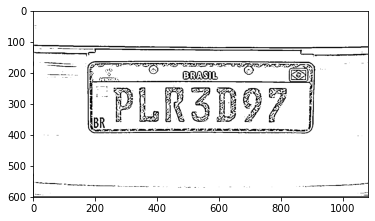

In [11]:
lim_adapt = cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
plt.imshow(lim_adapt, cmap='gray');

## Limiaziração de Otsu

In [12]:
imagem

array([[ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   3, ...,   5,   5,   5],
       ...,
       [ 14,  14, 144, ..., 122, 121, 120],
       [ 14,  14,  14, ...,  14,  14,  14],
       [ 14,  14,  14, ...,  14,  14,  14]], dtype=uint8)

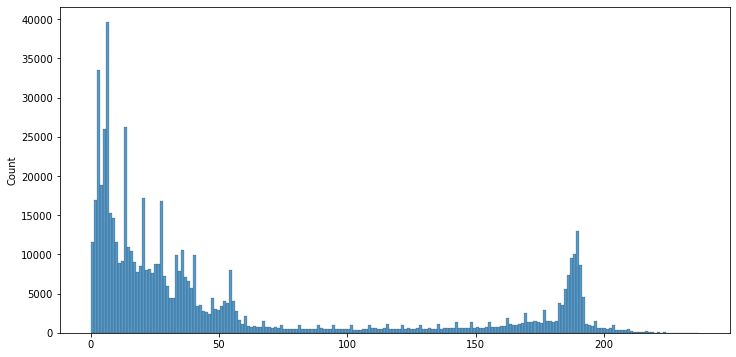

In [13]:
import seaborn as sns
ax = sns.histplot(imagem.flatten())
ax.figure.set_size_inches(12, 6)

Limiar de Otsu: 96.0


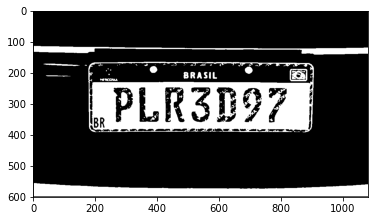

In [14]:
valor, lim_otsu = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(lim_otsu, cmap='gray');
print(f"Limiar de Otsu: {valor}")

In [15]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata --psm 6'

In [26]:
texto = pytesseract.image_to_string(lim_otsu, lang='por', config=config_tesseract)
print(texto)

In [19]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

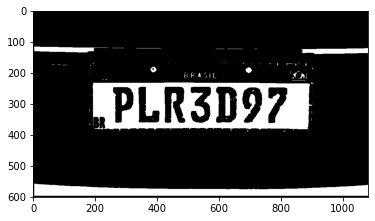

In [24]:
erosao = cv2.erode(lim_otsu, kernel)
plt.imshow(erosao, cmap='gray');

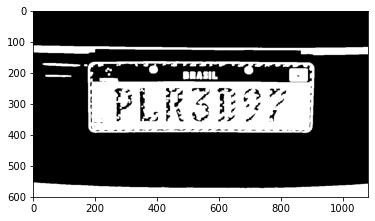

In [25]:
dilatacao = cv2.dilate(lim_otsu, kernel)
plt.imshow(dilatacao, cmap='gray');

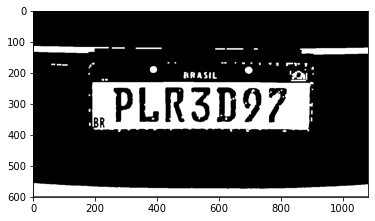

In [27]:
abertura = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)
plt.imshow(abertura, cmap='gray');

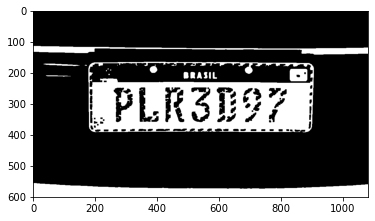

In [28]:
fechamento = cv2.morphologyEx(lim_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(fechamento, cmap='gray');

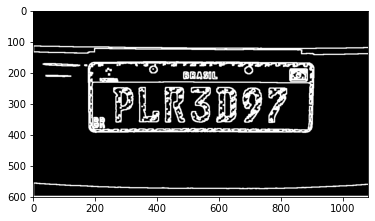

In [29]:
gradiente_morfologico = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradiente_morfologico, cmap='gray');

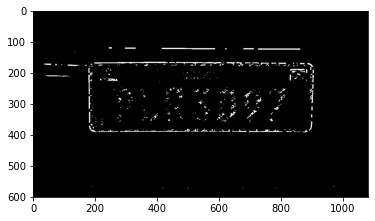

In [30]:
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel)
plt.imshow(cartola, cmap='gray');

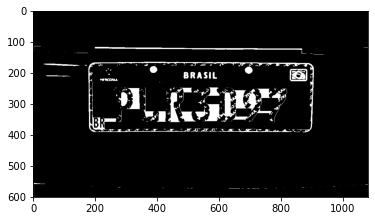

In [31]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel_retangular)
plt.imshow(cartola, cmap='gray');

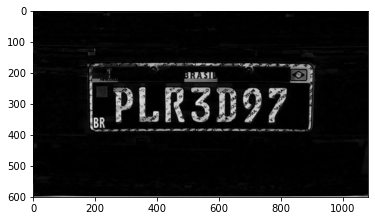

In [33]:
chapeu_preto = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
plt.imshow(chapeu_preto, cmap='gray');

In [34]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang='por', config=config_tesseract)
print(texto)

he 0.0 Te

EE

 PLR3D97 |



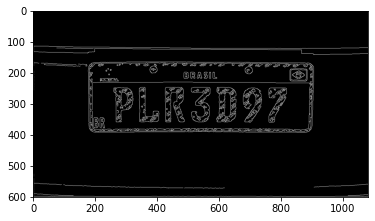

In [35]:
bordas = cv2.Canny(imagem, 100, 200)
plt.imshow(bordas, cmap='gray');

In [42]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contorno in contornos:
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break

In [43]:
localizacao

array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)

In [44]:
x, y, w, h = cv2.boundingRect(localizacao)

In [45]:
print(x, y, w, h)

180 168 722 224


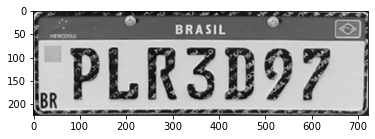

In [46]:
placa = imagem[y:y+h, x:x+w]
plt.imshow(placa, cmap='gray');

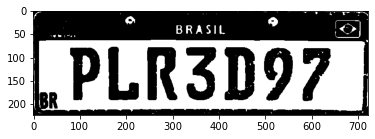

In [50]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
erosao = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
plt.imshow(erosao, cmap='gray');

In [68]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang='por', config=config_tesseract)
print(texto)

 PLR3D97.



In [52]:
import re
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
print(texto_extraido.group())

PLR3D97


# Aplicando em outra imagem

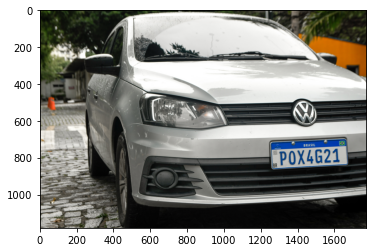

In [54]:
imagem = cv2.imread('imagens/placa_carro2.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem);

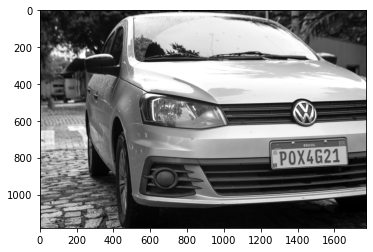

In [55]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.imshow(imagem, cmap='gray');

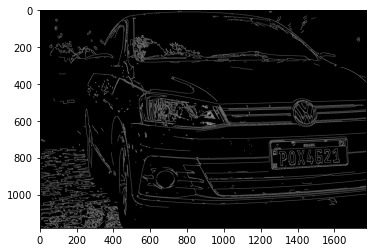

In [56]:
bordas = cv2.Canny(imagem, 100, 200)
plt.imshow(bordas, cmap='gray');

In [57]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:10]

In [58]:
for contorno in contornos:
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break

In [59]:
localizacao

array([[[1659,  737]],

       [[1255,  757]],

       [[1260,  850]],

       [[1660,  834]]], dtype=int32)

In [60]:
x, y, w, h = cv2.boundingRect(localizacao)

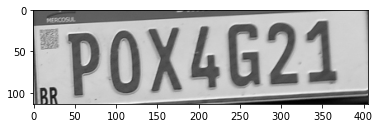

In [70]:
placa = imagem[y:y+h, x:x+w]
plt.imshow(placa, cmap='gray');

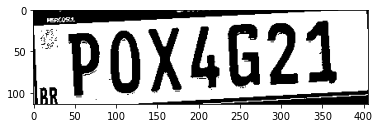

In [66]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(lim_otsu, cmap='gray');

In [80]:
texto = pytesseract.image_to_string(lim_otsu, lang='por', config=config_tesseract)
print(texto)